In [29]:
##Imports
import pandas as pd
import numpy as np
##%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')

In [31]:
##Drop a column
#df = df.drop(columns ="name")

In [32]:
df.columns

Index(['id', 'address', 'longitude', 'latitude', 'bedroom', 'room', 'surface',
       'price', 'onesquaremeter', 'tags', 'district', 'neighborhood', 'done'],
      dtype='object')

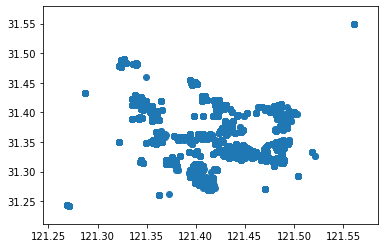

In [33]:
plt.scatter(df.longitude,df.latitude)

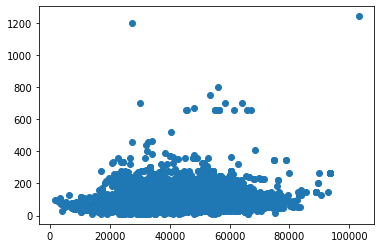

In [34]:
plt.scatter(df['onesquaremeter'],df['surface'])

In [38]:
X = df[['latitude','longitude','bedroom','room','surface']]
Y = df['onesquaremeter']

In [40]:
from sklearn.preprocessing import MinMaxScaler 
X = MinMaxScaler().fit_transform(X)
Y = MinMaxScaler().fit_transform(Y)

NameError: name 'fit_transform' is not defined

(array([1.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 9.000e+00,
        7.000e+00, 5.000e+00, 4.200e+01, 6.700e+01, 3.800e+01, 2.000e+01,
        1.730e+02, 1.810e+02, 2.190e+02, 2.840e+02, 1.390e+02, 1.600e+02,
        1.310e+02, 1.420e+02, 3.620e+02, 2.580e+02, 3.280e+02, 4.490e+02,
        4.200e+02, 4.340e+02, 3.820e+02, 2.980e+02, 3.130e+02, 2.590e+02,
        3.480e+02, 3.600e+02, 3.270e+02, 4.590e+02, 4.820e+02, 6.550e+02,
        7.510e+02, 9.160e+02, 1.013e+03, 1.096e+03, 1.358e+03, 1.356e+03,
        1.383e+03, 1.614e+03, 1.405e+03, 1.340e+03, 1.409e+03, 1.254e+03,
        1.330e+03, 9.770e+02, 1.126e+03, 8.660e+02, 8.720e+02, 7.570e+02,
        7.080e+02, 5.850e+02, 6.060e+02, 5.970e+02, 5.150e+02, 4.710e+02,
        3.200e+02, 3.640e+02, 2.910e+02, 2.410e+02, 2.540e+02, 2.290e+02,
        1.110e+02, 8.200e+01, 1.070e+02, 8.000e+01, 4.300e+01, 1.050e+02,
        3.100e+01, 1.700e+01, 1.600e+01, 6.000e+00, 1.000e+00, 5.000e+00,
        8.000e+00, 1.000e+00, 9.000e+0

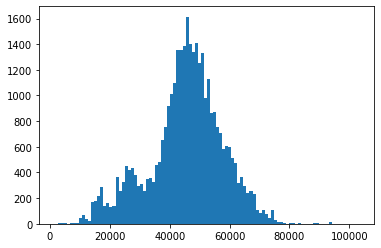

In [8]:
plt.hist(Y,100)

In [9]:
Z= pd.DataFrame.copy(Y)
Z[Y<=46000] = 'Cheap'
Z[Y>46000] ="Expensive"

In [10]:
##Machine learning imports
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Z)

In [12]:
X_train, Z_train = X[0:20000],Z[0:20000]
X_val , Z_val = X[20000:len(X)],Z[20000:len(Z)]
clf = clf.fit(X_train,Z_train)

In [13]:
Z_pred = clf.predict(X_val)

In [14]:
np.mean(Z_pred ==Z_val)

0.6528163152053275

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf,X,Z,cv=5)
np.mean(scores)

0.5383610623754236

[Text(167.4, 181.2, 'X[0] <= 31.348\nentropy = 0.5\nsamples = 34416\nvalue = [16751, 17665]'),
 Text(83.7, 108.72, 'X[4] <= 77.5\nentropy = 0.322\nsamples = 16401\nvalue = [3306, 13095]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.405\nsamples = 8640\nvalue = [2438, 6202]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.199\nsamples = 7761\nvalue = [868, 6893]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 31.405\nentropy = 0.379\nsamples = 18015\nvalue = [13445, 4570]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.445\nsamples = 12966\nvalue = [8626, 4340]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.087\nsamples = 5049\nvalue = [4819, 230]')]

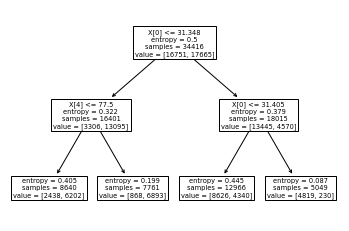

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Z)
tree.plot_tree(clf)

In [17]:
from sklearn import ensemble
adb = ensemble.AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = adb.fit(X_train,Z_train)
score= cross_val_score(clf,X,Z,cv =ShuffleSplit(n_splits=5))
np.mean(score)

0.7701917489831492

In [18]:
Z = Y.copy()
Z[Y <= 15000] = 'Very Cheap'
Z[(15000<= Y) & (Y <= 30000)] = 'Cheap'
Z[(45000>= Y) & (Y >= 30000)] = 'Normal'
Z[(60000>= Y) & (Y >= 45000)] = 'Expensive'
Z[Y >= 60000] = 'Very Expensive'

In [61]:
Z = Y.copy()
Z[Y <= np.quantile(Y, 0.25)] = 0
Z[(Y > np.quantile(Y, 0.25))&(Y <= np.quantile(Y, 0.5))] =1
Z[(Y > np.quantile(Y, 0.5))&(Y < np.quantile(Y, 0.75))] =2
Z[Y >= np.quantile(Y, 0.75)] = 3

In [62]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,4,6,8,10,20,40,100]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = ShuffleSplit(n_splits=5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 

In [64]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
clf = tree.DecisionTreeClassifier(max_depth=20)
scores = cross_val_score(clf,X,Z,cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7638582219639745

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test ,Z_train, Z_test  = train_test_split(X,Z, test_size = 0.33,random_state=3)

In [67]:
import time
time.time()

1576049578.6728253

In [68]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
clf = LinearSVC()
t=time.time()
clf.fit(X_train,Z_train)
time.time()-t

0.4132354259490967

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
t = time.time()
param_grid = {'C' : [0.1,1,10,100]}
search = GridSearchCV(LinearSVC(),param_grid,cv=5)
search.split(X_train,Z_train)
time.time()-t

AttributeError: 'GridSearchCV' object has no attribute 'split'

In [70]:
t = time.time()
from sklearn.model_selection import cross_val_score
clf=SVC(kernel ='linear')
#score = cross_val_score(clf, X_train,Z_train,cv=5)
clf.fit(X_train,Z_train)
t-time.time()

KeyboardInterrupt: 

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
t = time.time()
param_grid = {'n_estimators' : [100,200,300]}
clf = AdaBoostClassifier()
search = GridSearchCV(clf,param_grid,cv=5)
search.fit(X_train,Z_train)
time.time()-t

29.94971776008606

In [85]:
search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=None)

In [86]:
search.best_score_

0.6095064619654783

In [87]:
clf = AdaBoostClassifier(n_estimators=300)
clf.fit(X_train,Z_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=None)

In [88]:
Z_pred = clf.predict(X_test)

In [89]:
np.mean(Z_pred ==Z_test)

0.6016023947878147

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn

SyntaxError: invalid syntax (<ipython-input-78-6405458ef362>, line 2)

In [90]:
ZZ = Z_test.to_numpy()

In [91]:
conf_matrix = np.zeros((4,4))
for k in range(len(Z_pred)):
    conf_matrix[int(Z_pred[k]),int(ZZ[k])]+=1

In [92]:
conf_matrix

array([[1959.,  470.,  259.,  108.],
       [ 545., 1513.,  603.,   82.],
       [ 191.,  682., 1371.,  664.],
       [ 152.,  191.,  578., 1990.]])

In [94]:
conf_matrix[0,3]/np.sum(conf_matrix[:,3])

0.0379746835443038